# Wine flavor quality prediction?

In [1]:
#importing libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import sklearn.metrics as skm



import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
display.set_matplotlib_formats('svg')


In [2]:
#getting the dataset - there are 2 sets: red wines and white wines
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
rwine_data = pd.read_csv(url_red, sep=';')
wwine_data = pd.read_csv(url_white, sep=';')


# Statistical description of the data

In [3]:
rwine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
#labeling red wines as wine type 1
rwine_data['wine type'] = 1

In [5]:
rwine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine type  
0      9.4        5          1  
1      9.8        5          1  
2      9.8        5          1  
3      9.8        6          1  
4      9.4        5          1

In [6]:
wwine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [7]:
wwine_data['wine type'] = 0

# We concatenate the two data frames

In [8]:
allwine_data = pd.concat([rwine_data, wwine_data], axis=0, ignore_index=True)

[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol'),
 Text(11, 0, 'quality'),
 Text(12, 0, 'wine type')]

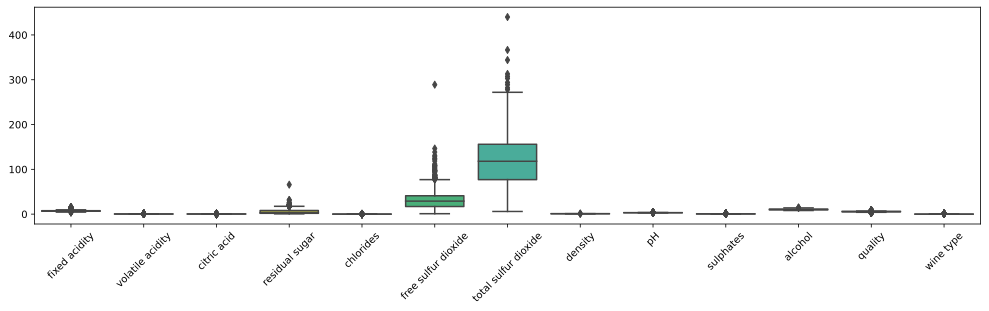

In [9]:
#plot some data 
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=allwine_data)
ax.set_xticklabels(allwine_data.columns,rotation=45)

# We normalize all the data

In [10]:
# we drop the columns quality and wine type since those don't need normalization.
normed_alldata = allwine_data.drop(['quality', 'wine type'], axis=1)

for col in normed_alldata.columns:
    #getting mean and standard deviation...
    col_mean = np.mean(normed_alldata[col])
    col_std = np.std(normed_alldata[col], ddof=1)
    #normalizing data
    normed_alldata[col] = (normed_alldata[col] - col_mean) / col_std


[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol')]

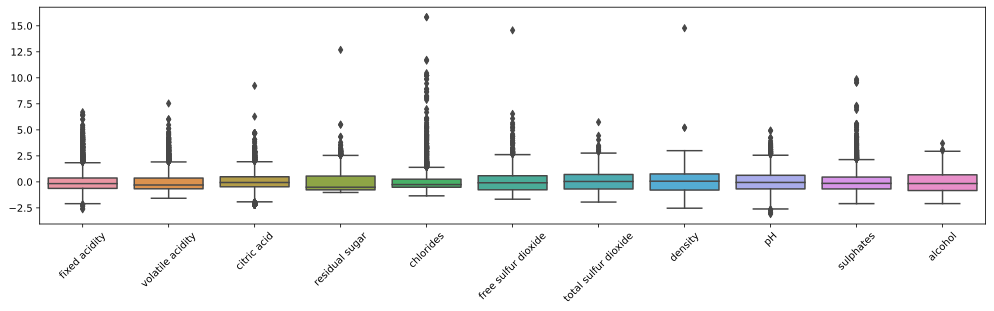

In [11]:
#plot the normalized data
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=normed_alldata)
ax.set_xticklabels(normed_alldata.columns,rotation=45)

# Now we check how is the data balanced

([<matplotlib.axis.XTick at 0x7f569047e610>,
 [Text(0, 0, 'White'), Text(1, 0, 'Red')])

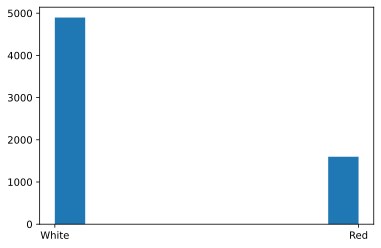

In [12]:
plt.hist(allwine_data['wine type'].values)
plt.xticks([0,1], labels=['White','Red'])


# We need to select the same amount of points to ensure our model doesn't over train only one type of wine

In [13]:
# making a *randomized* selection of white wine data
white_ix = np.where(allwine_data['wine type']==0)[0]
red_ix = np.where(allwine_data['wine type']==1)[0]

#this are the indexes we are going to choose for our dataset
ix_selec = np.concatenate([np.random.choice(white_ix, len(red_ix)), red_ix])


In [14]:
#defining the data and target
normed_allselect = normed_alldata.iloc[ix_selec]
wine_target = allwine_data['wine type'].values[ix_selec]

# Now we are going to define a function to build data loaders to use then for our model in Pytorch format

In [15]:
# function that will help us to build the data loaders for PyTorch
def get_loaders(data, target, test_size, batch_size):
    #first converting to torch format
    Tdata = torch.tensor(data.values).float()
    Ttarget = torch.tensor(target).float()[:, None]
    
    #split the data
    train_data, test_data, train_labels, test_labels = train_test_split(Tdata, Ttarget, test_size=test_size)
    
    #creating datasets for the loaders
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)
    
    #creating loaders, dropping last to have equal size loaders.
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])
    
    return train_loader, test_loader

# Now we build the loaders

In [16]:
train_loader, test_loader = get_loaders(
    normed_allselect, wine_target, test_size=0.2, batch_size=64)


# We can use Torch base NN class to create our own model 

In [17]:
#defining our class for this ANN model
class ANN_wine(nn.Module):
    def __init__(self, n_input):  # initiating class, setting number of input nodes as variable
        super().__init__()

        #intput for the n_input features to 16 nodes
        self.input = nn.Linear(n_input, 16)

        #First layer
        self.fc1 = nn.Linear(16, 32)
        self.bnorm1 = nn.BatchNorm1d(16)
        #second layer
        self.fc2 = nn.Linear(32, 20)
        self.bnorm2 = nn.BatchNorm1d(32)
        #third layer
        self.fc3 = nn.Linear(20, 16)
        self.bnorm3 = nn.BatchNorm1d(20)
        #the output
        self.output = nn.Linear(16, 1)

    #defining forward pass with ReLu activation functions
    def forward(self, x):  
        #input forward
        x = F.relu(self.input(x))

        #forward of layer 1 with batch normalization
        x = self.bnorm1(x)
        x = F.relu(self.fc1(x))
        #forward of layer 2 with  batch normalization
        x = self.bnorm2(x)
        x = F.relu(self.fc2(x))
        #forward of layer 3 with  batch normalization
        x = self.bnorm3(x)
        x = F.relu(self.fc3(x))

        return self.output(x)


# Making sure the model and data are in right format

In [18]:
#Data loaders check...
X, y = next(iter(train_loader))
print(X.shape)
print(y.shape)

ANN_winetype = ANN_wine(11)
y_hat = ANN_winetype(X)
print(y_hat.shape)


torch.Size([64, 11])
torch.Size([64, 1])
torch.Size([64, 1])


# Now we define a function to train our model, in this case we are going to use Binary Cross-Entropy (BCE) for the loss function since is a binary categorization, with the Adam optimizer

In [19]:
def train_model(model,train_loader, test_loader, n_epochs, learn_rate):
    #loss function: binary cross entropy.
    lossfun = nn.BCEWithLogitsLoss()
    #defining the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    #now we initialize the losses and accuracy
    losses = torch.zeros(n_epochs)
    train_acc = []
    test_acc = []
    for epoch_i in range(n_epochs):
        #using the model in training mode
        model.train()
        batch_acc = []
        batch_loss = []
        
        #Now we loop over the batches
        for X, y in train_loader:
            #forward
            y_hat = model(X)
            loss = lossfun(y_hat, y)
            
            #back propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            #storing batch loss and accuracy
            batch_loss.append(loss.item())
            batch_acc.append( 100*torch.mean( ((y_hat>0) == y).float()).item())
        
        #saving epoch's loss and accuracy 
        train_acc.append(np.mean(batch_acc))
        losses[epoch_i] = np.mean(batch_loss)
        
        #now we evaluate the model with the test data
        #switch to evaluation mode
        model.eval()
        X, y = next(iter(test_loader))
        
        #forward
        with torch.no_grad():
            y_hat = model(X)
        #accuracy for test data    
        test_acc.append( 100*torch.mean(((y_hat>0) == y).float()).item())
        
    return train_acc, test_acc, losses

# Train our model and plot results

In [20]:
train_acc, test_acc, losses = train_model(ANN_winetype,
                                          train_loader,
                                          test_loader,
                                          n_epochs=200,
                                          learn_rate=0.001
                                          )


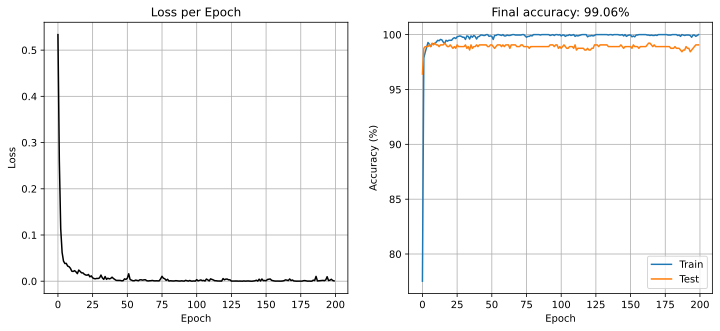

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(losses, 'k-')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss per Epoch')
ax[0].grid()

ax[1].plot(train_acc)
ax[1].plot(test_acc)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final accuracy: {test_acc[-1]:.2f}%')
ax[1].legend(['Train','Test'])
ax[1].grid()


# Now doing some report metrics

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# we can evaluate how good our model is by classifying all the data of our original data frame

In [23]:
X, y = next(iter(test_loader))

In [24]:
y_hat = ANN_winetype(X)
pred_wine = (y_hat > 0).detach().numpy()

In [25]:
cr = classification_report(y, pred_wine)
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       329
         1.0       0.99      0.99      0.99       311

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



In [26]:
CM_winetype = confusion_matrix(y, pred_wine)

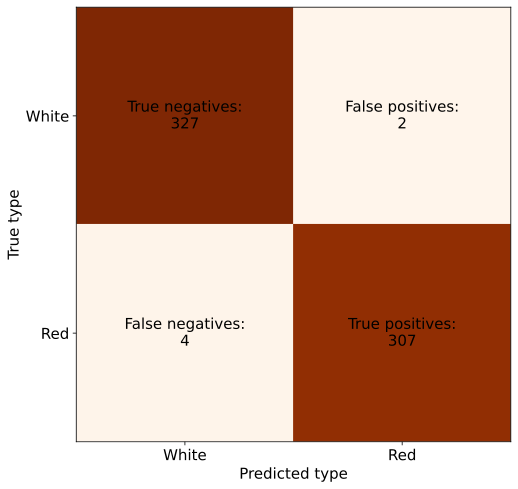

In [27]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 8))
plt.imshow(CM_winetype, 'Oranges')
plt.xticks([0, 1], ['White', 'Red'])
plt.yticks([0, 1], ['White', 'Red'])
plt.xlabel('Predicted type')
plt.ylabel('True type')

plt.text(0, 0, f'True negatives:\n{CM_winetype[0,0]}', ha='center', va='center')
plt.text(
    0, 1, f'False negatives:\n{CM_winetype[1,0]}', ha='center', va='center')
plt.text(1, 1, f'True positives:\n{CM_winetype[1,1]}', ha='center', va='center')
plt.text(
    1, 0, f'False positives:\n{CM_winetype[0,1]}', ha='center', va='center')

plt.show()


# if we compare the chemical properties distributions we can see how these are different for each type of wine

In [28]:
#selecting chemical properties that contribute to flavor
chem_prop = normed_allselect.columns.drop(
    ['free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'density', 'chlorides']).values
chem_prop


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'pH', 'alcohol'], dtype=object)

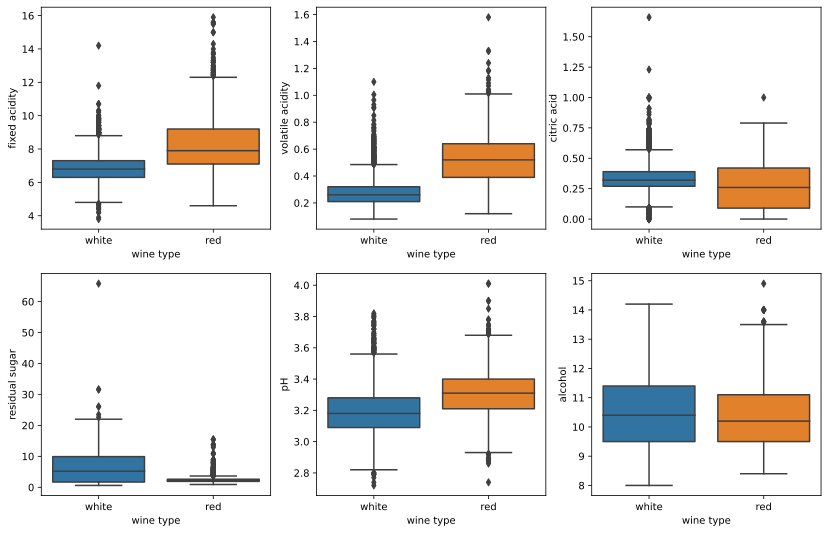

In [29]:
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(2, 3, figsize=(14, 9))
prop_c = 0  # counter

for i in range(2):
    for j in range(3):
        sns.boxplot(data=allwine_data, x='wine type', y = chem_prop[prop_c], ax=ax[i,j])
        ax[i,j].set_xticklabels(['white','red'])
        prop_c += 1

plt.show()

## Because the chemical properties are so different between type of wine it is convenient to do a separate analysis for each type of wine.

# we are going to estimate chemical properties for each type of wine

In [30]:
#we are going to normalize wine properties except for the quality (or target)
normed_wdata = wwine_data.drop(['quality', 'wine type'], axis=1)

for col in normed_wdata.columns:
    #getting mean and standard deviation...
    col_mean = np.mean(normed_wdata[col])
    col_std = np.std(normed_wdata[col], ddof=1)
    #normalizing data 
    normed_wdata[col] = (normed_wdata[col] - col_mean) / col_std

# Setting up new dataset and targets

In [31]:
#the first chemical property in the list 
new_data = normed_wdata.drop(chem_prop[0], axis=1)
new_target = wwine_data[chem_prop[0]].values

# Construct the loaders

In [32]:
#making loaders
train_loader, test_loader = get_loaders(new_data, new_target, test_size=0.2, batch_size=64)

# We define another training function for this model, using Mean Square Error this time because is a regression problem.

In [33]:
def train_model_2(model, train_loader, test_loader, n_epochs, learn_rate):
    #loss function: Mean Square Error - for regression.
    lossfun = nn.MSELoss()
    #defining the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    #now we initialize the losses and accuracy
    losses = torch.zeros(n_epochs)
    train_acc = []
    test_acc = []
    for epoch_i in range(n_epochs):
        #using the model in training mode
        model.train()
        batch_acc = []
        batch_loss = []

        #Now we loop over the batches
        for X, y in train_loader:
            #forward
            y_hat = model(X)
            loss = lossfun(y_hat, y)

            #back propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #storing batch loss and accuracy
            batch_loss.append(loss.item())
            #computing pearson correlation for "accuracy"
            batch_cor = np.corrcoef(np.concatenate(np.array(y_hat.detach())),np.concatenate(np.array(y)))[0,1]
            batch_acc.append(batch_cor)

        #saving epoch's loss and accuracy
        train_acc.append(np.mean(batch_acc))
        losses[epoch_i] = np.mean(batch_loss)

        #now we evaluate the model with the test data
        #switch to evaluation mode
        model.eval()
        X, y = next(iter(test_loader))

        #forward
        with torch.no_grad():
            y_hat = model(X)
        #accuracy for test data
        test_cor = np.corrcoef(np.concatenate(
            np.array(y_hat.detach())), np.concatenate(np.array(y)))[0, 1]
        test_acc.append(test_cor)

    return train_acc, test_acc, losses


# Using 10 inputs instead of 11 this time.

In [34]:
#defining a new model and passing data through it 
chemprop_model = ANN_wine(10)


In [35]:

X, y = next(iter(train_loader))
#evaluating
y_hat = chemprop_model(X)
print(X.shape)
print(y.shape)
print(y_hat.shape)


torch.Size([64, 10])
torch.Size([64, 1])
torch.Size([64, 1])


In [36]:
m2_trainacc, m2_testacc, m2_losses = train_model_2(chemprop_model, train_loader, test_loader, n_epochs=200, learn_rate=0.001)



Text(0.5, 0.98, 'Fixed Acidity')

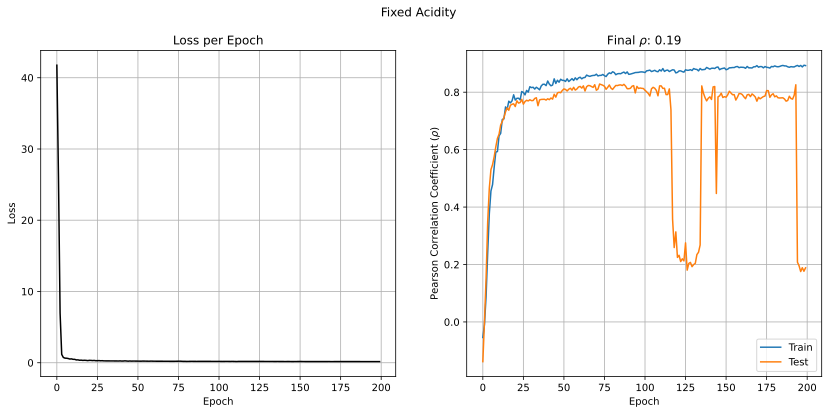

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(m2_losses, 'k-')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss per Epoch')
ax[0].grid()

ax[1].plot(m2_trainacc)
ax[1].plot(m2_testacc)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel(r'Pearson Correlation Coefficient ($\rho$)')
ax[1].set_title('Final ' r'$\rho$' f': {m2_testacc[-1]:.2f}')
ax[1].grid()
ax[1].legend(['Train', 'Test'])

fig.suptitle('Fixed Acidity')


# Now we evaluate the pearson

In [38]:
train_data = train_loader.dataset.tensors
test_data = test_loader.dataset.tensors

In [39]:
train_pred = chemprop_model(train_data[0])
test_pred = chemprop_model(test_data[0])

In [40]:
train_pred.shape

torch.Size([3918, 1])

In [41]:
pcor_train = np.corrcoef(np.concatenate(np.array(train_pred.detach().numpy())),np.concatenate(train_data[1].detach().numpy()))[0,1]
pcor_test = np.corrcoef(np.concatenate(np.array(test_pred.detach().numpy())),np.concatenate(test_data[1].detach().numpy()))[0,1]  

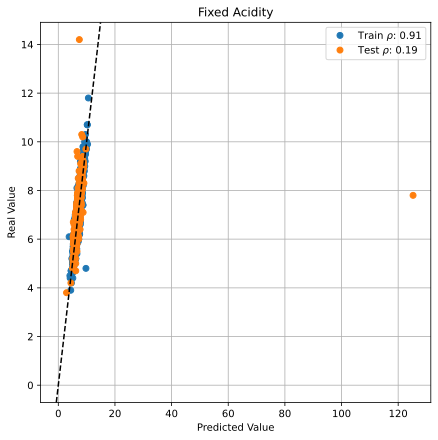

In [42]:
plt.figure(figsize=(7,7))
plt.plot(train_pred.detach(), train_data[1].detach(), 'o')
plt.plot(test_pred.detach(), test_data[1].detach(), 'o')
plt.grid()
plt.legend(('Train ' r'$\rho$' f': {pcor_train:.2f}', 'Test ' r'$\rho$' f': {pcor_test:.2f}'))
plt.title('Fixed Acidity')
#plt.xlim([0,60])
plt.xlabel('Predicted Value')
plt.ylabel('Real Value')
plt.axline((0, 0), slope=1, linestyle='--', color='k', label=None)
plt.show()


# We do it for all the chemical properties

In [43]:
pcor_trains = np.zeros(6)
pcor_tests = np.zeros(6)
pred_trains = []
pred_tests = []
data_trains = []
data_tests = []

for (nc,chemprop) in enumerate(chem_prop):
    new_data = normed_wdata.drop(chemprop, axis=1)
    new_target = wwine_data[chemprop].values

    train_loader, test_loader = get_loaders(
        new_data, new_target, test_size=0.2, batch_size=64)

    chemprop_model = ANN_wine(10)

    _ = train_model_2(
        chemprop_model, train_loader, test_loader, n_epochs=200, learn_rate=0.001)


    train_data = train_loader.dataset.tensors
    test_data = test_loader.dataset.tensors

    train_pred = chemprop_model(train_data[0])
    test_pred = chemprop_model(test_data[0])
    
    pcor_train = np.corrcoef(np.concatenate(np.array(train_pred.detach().numpy())),np.concatenate(train_data[1].detach().numpy()))[0,1]
    pcor_test = np.corrcoef(np.concatenate(np.array(test_pred.detach().numpy())),np.concatenate(test_data[1].detach().numpy()))[0,1]  

    pcor_trains[nc] = pcor_train
    pcor_tests[nc] = pcor_test
    
    pred_trains.append(train_pred)
    pred_tests.append(test_pred)
    data_trains.append(train_data[1])
    data_tests.append(test_data[1])
    

# Plot the results

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
prop_c = 0 #counter

for i in range(2):
    for j in range(3):
        xl = [np.min(pred_trains[prop_c].detach().numpy()), np.max(pred_trains[prop_c].detach().numpy())]
        yl = [np.min(pred_trains[prop_c].detach().numpy()), np.max(pred_trains[prop_c].detach().numpy())]
        ax[i,j].plot(pred_trains[prop_c].detach(), data_trains[prop_c].detach(), 'o')
        ax[i,j].plot(pred_tests[prop_c].detach(), data_tests[prop_c].detach(), 'o')
        ax[i,j].grid()
        ax[i,j].set_xlim(xl)
        ax[i,j].set_ylim(yl)
        ax[i,j].legend(('Train ' r'$\rho$' f': {pcor_trains[prop_c]:.2f}',
                'Test ' r'$\rho$' f': {pcor_tests[prop_c]:.2f}'))
        ax[i,j].set_title(chem_prop[prop_c])
        #ax[i,j].xlim([0, 60])
        ax[i,j].set_xlabel('Predicted Value')
        ax[i,j].set_ylabel('Real Value')
        ax[i,j].axline((0, 0), slope=1, linestyle='--', color='k', label=None)
        prop_c += 1



# Can we predict the wine quality by its chemical properties?

In [45]:
target = wwine_data['quality'].values

## Before starting training a model to predict the wine quality we need to see the statistics of the target values 

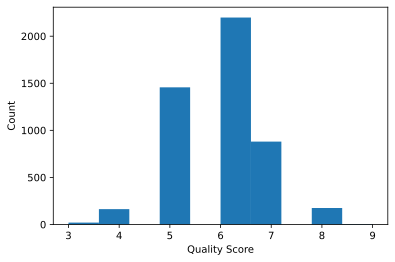

In [46]:
plt.hist(target)
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# We binarize the quality values so we have less categories

In [47]:
#we set 0 = not good, 1 = good
boolean_target = np.array([0 if target[i] < 6 else 1 for i in range(len(target))] )


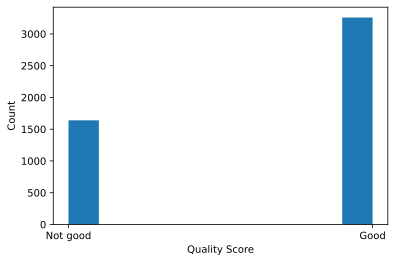

In [48]:
plt.hist(boolean_target)
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks([0,1], labels=['Not good', 'Good'])
plt.show()


# The data is still unbalanced, we can use it like this and test if it affects accuracy

In [49]:

good_ix = np.where(boolean_target==1)[0]
bad_ix = np.where(boolean_target==0)[0]


In [50]:
n_samps = len(bad_ix)

# We select the same number of samples for each of the Quality Scores

In [51]:
#selecting at random
# we choose at random n_samps for the 1 'quality' and 
ix_selec = np.concatenate([np.random.choice(good_ix, n_samps), bad_ix])

In [52]:
len(ix_selec)

3280

In [53]:
# we use the selection for the data 
btarget_select = boolean_target[ix_selec]
normed_select = normed_wdata.iloc[ix_selec]


# We construct the loaders we are going to use to try to predict wine quality

In [54]:
train_loader, test_loader = get_loaders(normed_select, btarget_select, test_size=0.2, batch_size=64)

# We can check the shape of the loaders to make sure they are correct

In [55]:
#checking that the loaders are correct 
X,y = next(iter(train_loader))
print(X.shape)
print(y.shape)

torch.Size([64, 11])
torch.Size([64, 1])


# Passing data through the model the verify is working

In [56]:
# we pass the data through the model to check it doesn't have any errors
ANN_model = ANN_wine(11)
y_hat = ANN_model(X)
print(y_hat.shape)

torch.Size([64, 1])


# Training the model and saving the training data

In [57]:
train_acc, test_acc, losses = train_model(ANN_model, 
                                          train_loader, 
                                          test_loader,
                                          n_epochs=1000,
                                          learn_rate=0.001
                                          )

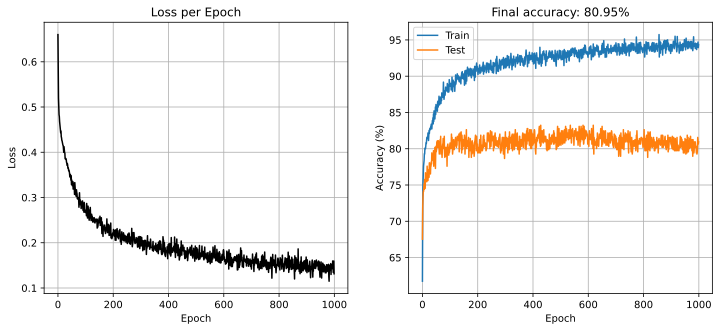

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(losses, 'k-')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss per Epoch')
ax[0].grid()

ax[1].plot(train_acc)
ax[1].plot(test_acc)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final accuracy: {test_acc[-1]:.2f}%')
ax[1].legend(['Train', 'Test'])
ax[1].grid()


In [59]:
X, y = next(iter(test_loader))

In [60]:
y_hat = ANN_model(X)
pred_wwine = (y_hat > 0).detach().numpy()


In [61]:
cr_wwine = classification_report(y, pred_wwine)
print(cr_wwine)

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       345
         1.0       0.79      0.82      0.80       311

    accuracy                           0.81       656
   macro avg       0.81      0.81      0.81       656
weighted avg       0.81      0.81      0.81       656



In [62]:
c_matrix = confusion_matrix(y, pred_wwine)

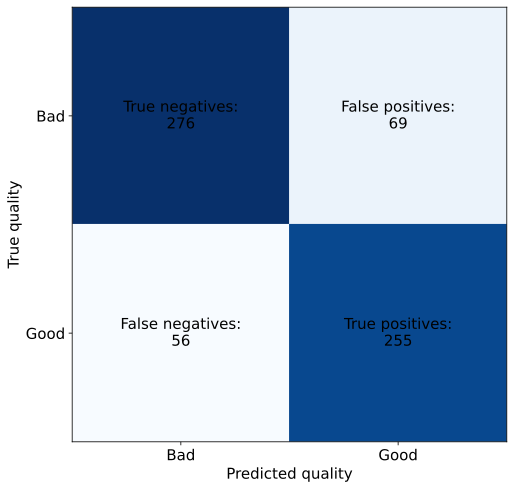

In [63]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 8))
plt.imshow(c_matrix, 'Blues')
plt.xticks([0,1], ['Bad','Good'])
plt.yticks([0,1],['Bad','Good'])
plt.xlabel('Predicted quality')
plt.ylabel('True quality')

plt.text(0, 0, f'True negatives:\n{c_matrix[0,0]}', ha='center', va='center')
plt.text(
    0, 1, f'False negatives:\n{c_matrix[1,0]}', ha='center', va='center')
plt.text(1, 1, f'True positives:\n{c_matrix[1,1]}', ha='center', va='center')
plt.text(
    1, 0, f'False positives:\n{c_matrix[0,1]}', ha='center', va='center')

plt.show()

# Now the red wine

In [64]:
#we are going to normalize wine properties except for the quality (or target)
normed_rdata = rwine_data.drop(['quality', 'wine type', 'volatile acidity', 'citric acid'], axis=1)

for col in normed_rdata.columns:
    #getting mean and standard deviation...
    col_mean = np.mean(normed_rdata[col])
    col_std = np.std(normed_rdata[col], ddof=1)
    #normalizing data
    normed_rdata[col] = (normed_rdata[col] - col_mean) / col_std


In [65]:
target = rwine_data['quality'].values
boolean_target = np.array(
    [0 if target[i] < 6 else 1 for i in range(len(target))])


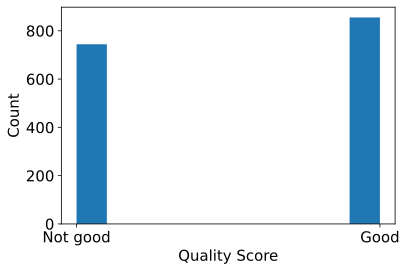

In [66]:
plt.hist(boolean_target)
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Not good', 'Good'])
plt.show()


In [67]:
train_loader, test_loader = get_loaders(
    normed_rdata, boolean_target, test_size=0.2, batch_size=64)


In [68]:
#checking that the loaders are correct
X, y = next(iter(train_loader))
print(X.shape)
print(y.shape)


torch.Size([64, 9])
torch.Size([64, 1])


In [69]:
# we pass the data through the model to check it doesn't have any errors
ANN_model = ANN_wine(9)
y_hat = ANN_model(X)
print(y_hat.shape)

torch.Size([64, 1])


In [70]:
train_acc, test_acc, losses = train_model(ANN_model,
                                          train_loader,
                                          test_loader,
                                          n_epochs=1000,
                                          learn_rate=0.001
                                          )


In [71]:
X, y = next(iter(test_loader))
y_hat = ANN_model(X)
pred_rwine = (y_hat > 0).detach().numpy()

cr_rwine = classification_report(y, pred_rwine)
print(cr_rwine)


              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78       152
         1.0       0.79      0.83      0.81       168

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



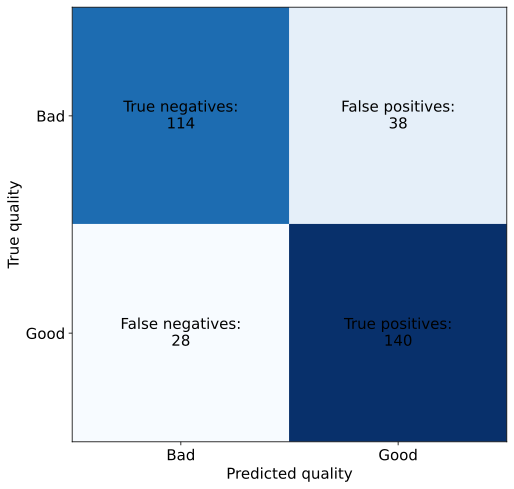

In [72]:
c_matrix = confusion_matrix(y, pred_rwine)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 8))
plt.imshow(c_matrix, 'Blues')
plt.xticks([0, 1], ['Bad', 'Good'])
plt.yticks([0, 1], ['Bad', 'Good'])
plt.xlabel('Predicted quality')
plt.ylabel('True quality')

plt.text(0, 0, f'True negatives:\n{c_matrix[0,0]}', ha='center', va='center')
plt.text(
    0, 1, f'False negatives:\n{c_matrix[1,0]}', ha='center', va='center')
plt.text(1, 1, f'True positives:\n{c_matrix[1,1]}', ha='center', va='center')
plt.text(
    1, 0, f'False positives:\n{c_matrix[0,1]}', ha='center', va='center')

plt.show()


In [73]:
#we are going to normalize wine properties except for the quality (or target)
normed_wdata = wwine_data.drop(
    ['quality', 'wine type', 'volatile acidity', 'citric acid'], axis=1)

for col in normed_wdata.columns:
    #getting mean and standard deviation...
    col_mean = np.mean(normed_wdata[col])
    col_std = np.std(normed_wdata[col], ddof=1)
    #normalizing data
    normed_wdata[col] = (normed_wdata[col] - col_mean) / col_std
# Setting up new dataset and targets


torch.Size([64, 9])
torch.Size([64, 1])
torch.Size([64, 1])


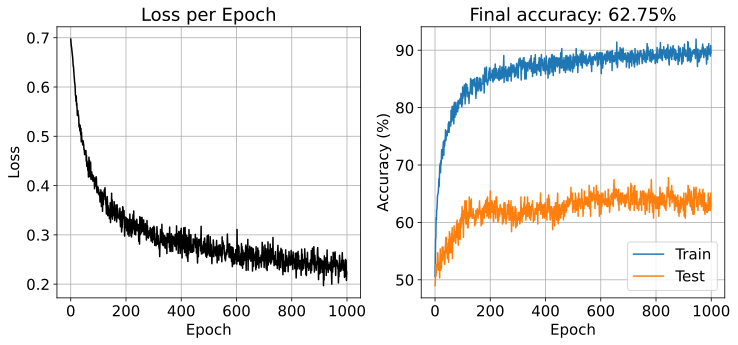

In [74]:

good_ix = np.where(boolean_target == 1)[0]
bad_ix = np.where(boolean_target == 0)[0]

n_samps = len(bad_ix)
# We select the same number of samples for each of the Quality Scores
#selecting at random
# we choose at random n_samps for the 1 'quality' and
ix_selec = np.concatenate([np.random.choice(good_ix, n_samps), bad_ix])
len(ix_selec)
# we use the selection for the data
btarget_select = boolean_target[ix_selec]
normed_select = normed_wdata.iloc[ix_selec]

# We construct the loaders we are going to use to try to predict wine quality
train_loader, test_loader = get_loaders(
    normed_select, btarget_select, test_size=0.2, batch_size=64)
# We can check the shape of the loaders to make sure they are correct
#checking that the loaders are correct
X, y = next(iter(train_loader))
print(X.shape)
print(y.shape)
# Passing data through the model the verify is working
# we pass the data through the model to check it doesn't have any errors
ANN_model = ANN_wine(9)
y_hat = ANN_model(X)
print(y_hat.shape)
# Training the model and saving the training data
train_acc, test_acc, losses = train_model(ANN_model,
                                          train_loader,
                                          test_loader,
                                          n_epochs=1000,
                                          learn_rate=0.001
                                          )
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(losses, 'k-')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss per Epoch')
ax[0].grid()

ax[1].plot(train_acc)
ax[1].plot(test_acc)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final accuracy: {test_acc[-1]:.2f}%')
ax[1].legend(['Train', 'Test'])
ax[1].grid()
